In [2]:
using Distributions
using SpecialFunctions
using Random
using Expectations
using Plots

In [3]:
res = 0
n = 1000000
for i in 1:n
    if (length(unique(sample(1:12,29)))==12)
        res += 1
    end
end
res/n

0.322902

In [4]:
r = rand(Normal(2,4),50)

50-element Vector{Float64}:
  6.815074258863101
 -0.045927983082809654
  5.911417092422516
  3.4651892096046915
  3.277673315776714
 -2.9841716708480845
  2.8765733798436237
  1.9455418733327823
  1.6337642579497322
  6.423064295455023
 -0.11027954831308229
 -7.249377606344652
  0.7327861387797916
  ⋮
  5.962621861946092
 -0.37822150164185686
 -1.0728513952560057
  3.4739600400538238
  2.217128702046243
  4.049276140901486
 -0.17946913838483658
  5.550756064828011
 -1.402612897945398
  2.5297356533460276
 -7.046771306050287
 -3.4835430116506947

In [5]:
N=15

15

In [6]:
k=0:15
p=0.25

0.25

In [7]:
map((k) -> binomial(N,k),k)

16-element Vector{Int64}:
    1
   15
  105
  455
 1365
 3003
 5005
 6435
 6435
 5005
 3003
 1365
  455
  105
   15
    1

In [9]:
# map((k) -> binomial(N,k),k)
binomial.(N,k) .* p.^k .* (1 .-p).^(N.-k)

16-element Vector{Float64}:
 0.013363461010158062
 0.06681730505079031
 0.15590704511851072
 0.22519906517118216
 0.22519906517118216
 0.16514598112553358
 0.0917477672919631
 0.039320471696555614
 0.013106823898851871
 0.0033980654552578926
 0.0006796130910515785
 0.00010297168046236038
 1.1441297829151154e-5
 8.800998330116272e-7
 4.190951585769653e-8
 9.313225746154785e-10

In [10]:
d = Binomial(N,p)

Binomial{Float64}(n=15, p=0.25)

In [17]:
k = 0:N

0:15

In [12]:
(pdf.(d,k))

8-element Vector{Float64}:
 0.013363461010158065
 0.06681730505079031
 0.1559070451185107
 0.22519906517118268
 0.22519906517118188
 0.1651459811255339
 0.09174776729196332
 0.03932047169655568

In [13]:
cdf(d,7)

0.9827001616358756

In [14]:
E = expectation(d);

In [15]:
E((x) -> (x^2))

16.875000000000018

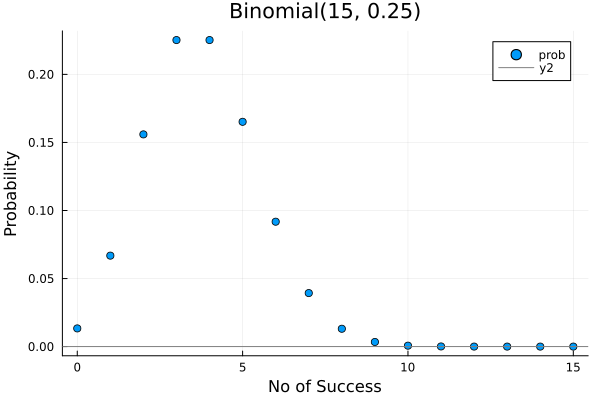

In [45]:
plot(k, pdf.(d, k), label = "prob", seriestype = "scatter")
title!("Binomial($N, $p)")
xlabel!("No of Success")
ylabel!("Probability")
hline!([0], color = "grey")

In [36]:
?hline

search: hline hline! eachline hardlink DirichletMultinomial



```
hline(y)
hline!(y)
```

Draw horizontal lines at positions specified by the values in the AbstractVector `y`.

# Example

```julia-repl
julia> hline([-1,0,2])
```


In [52]:
p

0.25

In [56]:
z = rand(Binomial(1,p), 100);

In [81]:
plt = plot(1:100, cumsum(rand(Binomial(1,p), 100))./(1:100), ylim=(0,1))
# plot(1:100, cumsum(rand(Binomial(1,p), 100))./(1:100), ylim=(0,1))
for i in 1:3
    push!(plt, 1:100, cumsum(rand(Binomial(1,p), 100))./(1:100), ylim=(0,1))
end

LoadError: MethodError: no method matching push!(::Plots.Plot{Plots.GRBackend}, ::UnitRange{Int64}, ::Vector{Float64}; ylim::Tuple{Int64, Int64})

[0mClosest candidates are:
[0m  push!(::Plots.Plot, ::AbstractVector, ::AbstractVector)[91m got unsupported keyword argument "ylim"[39m
[0m[90m   @[39m [35mPlots[39m [90mC:\Users\dutta\.julia\packages\Plots\3BCH5\src\[39m[90m[4mutils.jl:835[24m[39m
[0m  push!(::Plots.Plot, ::AbstractVector, ::AbstractVector, [91m::AbstractVector[39m)[91m got unsupported keyword argument "ylim"[39m
[0m[90m   @[39m [35mPlots[39m [90mC:\Users\dutta\.julia\packages\Plots\3BCH5\src\[39m[90m[4mutils.jl:845[24m[39m
[0m  push!(::Any, ::Any, ::Any)[91m got unsupported keyword argument "ylim"[39m
[0m[90m   @[39m [90mBase[39m [90m[4mabstractarray.jl:3387[24m[39m
[0m  ...


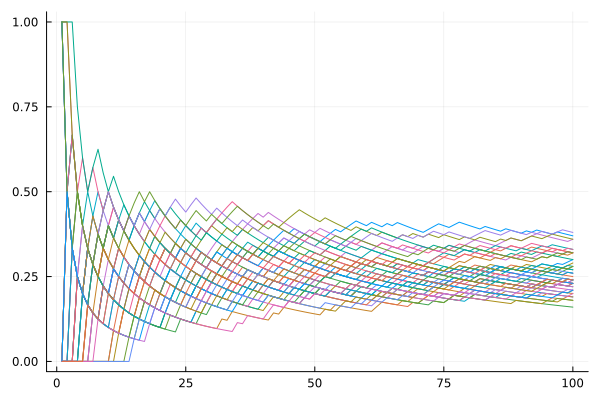

In [113]:
no_of_plots = 50
no_of_trials = 100
p = 0.25
z = rand(Binomial(1,p),(no_of_trials, no_of_plots))
plot(1:no_of_trials, cumsum(z, dims = 1)./(1:no_of_trials), legend = false)